In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib.image as mpimg

In [372]:
def get_dataset():
    path='E:\\cnns\\digit_prediction\\digit_'
    Y_list=[6]
    X=mpimg.imread('E:\\cnns\\digit_prediction\\digit_6\\digit6__4cc17a78-77e9-11e7-8382-0af8d8ef1070.jpg')
    X=X[:,:,1]
    X=X[np.int64(np.linspace(0,199,32))]
    X=X.T
    X=X[np.int64(np.linspace(0,199,32))]
    X=X.T
    X=X.reshape(1,32,32)
    
    
    for digit in range(0,10):
        no_of_examples=len(glob.glob('E:\\cnns\\digit_prediction\\digit_'+str(digit)+'\\*'))
        examples=glob.glob('E:\\cnns\\digit_prediction\\digit_'+str(digit)+'\\*')
        for i in examples:
            img=mpimg.imread(i)
            img=img[:,:,1]
            w=img.shape[0]
            h=img.shape[1]
            if w>=32 and h>=32:
                img=img[np.int64(np.linspace(0,w-1,32))]
                img=img.T
                img=img[np.int64(np.linspace(0,h-1,32))]
                img=img.T
                position=np.random.randint(X.shape[0])
                X=np.insert(X,position,values=img,axis=0)
                Y_list.insert(position,digit)
    Y=np.array(Y_list)
    return (X,Y)
    
    
            
            
            

In [373]:
def normalize(X_train):
    m=len(X_train)
    mean=(1/m)*np.sum(X_train,axis=0,keepdims=True)
    X_train=X_train-mean
    variance=np.sum(np.square(X_train),axis=0,keepdims=True)
    std=np.sqrt(variance)
    X_train=X_train/std
    return X_train
    

# preparing data

In [374]:
X,Y=get_dataset()

In [375]:
X_train=X/255.

In [376]:
df_Y=pd.DataFrame(Y)

In [377]:
# df=pd.get_dummies(df_Y[0])

In [378]:
Y_train=np.array(df_Y)

In [379]:
Y_train.shape

(6499, 1)

In [380]:
X_train.shape

(6499, 32, 32)

# architecture

In [381]:
import tensorflow as tf

In [382]:
from tensorflow import keras

In [383]:
from tensorflow.keras import layers


In [430]:
model=tf.keras.Sequential()

In [431]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,1),activation='relu',kernel_regularizer='l2'))

In [432]:
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

In [433]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(2,2),activation='relu'))

In [434]:
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

In [435]:
model.add(tf.keras.layers.Flatten())

In [436]:
model.add(tf.keras.layers.Dense(256,activation='relu',kernel_regularizer='l2'))


In [437]:
model.add(tf.keras.layers.Dense(256,activation='relu',kernel_regularizer='l2'))


In [438]:
model.add(tf.keras.layers.Dense(20,activation='relu',kernel_regularizer='l2'))

In [439]:
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [440]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [441]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 288)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 256)               73984     
_________________________________________________________________
dense_88 (Dense)             (None, 256)             

# training

In [442]:
history=model.fit(X_train.reshape(6499,32,32,1)[1000:,:,:,:], Y_train[1000:,:], epochs=50)

Train on 5499 samples
Epoch 1/50
5499/5499 [==============================] - 6s 1ms/sample - loss: 3.3952 - accuracy: 0.1591
Epoch 2/50
5499/5499 [==============================] - 4s 687us/sample - loss: 2.0446 - accuracy: 0.3259
Epoch 3/50
5499/5499 [==============================] - 4s 699us/sample - loss: 1.8478 - accuracy: 0.4190
Epoch 4/50
5499/5499 [==============================] - 4s 698us/sample - loss: 1.6574 - accuracy: 0.5032
Epoch 5/50
5499/5499 [==============================] - 4s 686us/sample - loss: 1.5364 - accuracy: 0.5577
Epoch 6/50
5499/5499 [==============================] - 4s 695us/sample - loss: 1.4442 - accuracy: 0.6123
Epoch 7/50
5499/5499 [==============================] - ETA: 0s - loss: 1.3648 - accuracy: 0.64 - 4s 694us/sample - loss: 1.3678 - accuracy: 0.6428
Epoch 8/50
5499/5499 [==============================] - 4s 684us/sample - loss: 1.3058 - accuracy: 0.6712
Epoch 9/50
5499/5499 [==============================] - 4s 703us/sample - loss: 1.2400 - a

999/999 - 1s - loss: 1.0438 - accuracy: 0.8028


[1.0438273649912577, 0.8028028]

In [168]:
model.save('weights.h5')

Text(0, 0.5, 'accuracy')

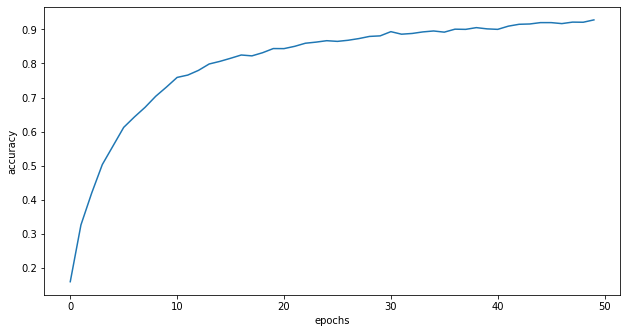

In [443]:
fig=plt.figure(figsize=(8,4))
axes=fig.add_axes([0,0,1,1])
axes.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
# plt.xticks([])
# plt.yticks([])

In [301]:
fig.savefig('accuracy.jpg')

# verification

In [444]:
model.evaluate(X_train.reshape(6499,32,32,1)[1:1000,:,:,:],Y_train[1:1000,:], verbose=2)

999/999 - 1s - loss: 1.0407 - accuracy: 0.7948


[1.0407428784413382, 0.7947948]

(1, 32, 32, 1)


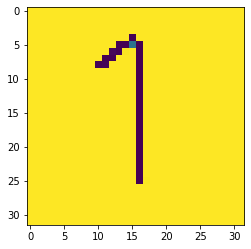

In [536]:
path=os.getcwd()
# print(path)
path=path+'\self_made\\one.jpg'
input_img=mpimg.imread(path)
plt.imshow(input_img)
h,w,d=input_img.shape
input_img=input_img[:,:,1]
input_img=input_img[np.int64(np.linspace(0,h-1,32))]
input_img=input_img.T
input_img=input_img[np.int64(np.linspace(0,w-1,32))]
input_img=input_img.T

input_img=input_img.reshape(1,32,32,1)
print(input_img.shape)
plt.imshow(input_img[0,:,:,0])

In [537]:
np.argmax(model.predict(input_img.reshape(1,32,32,1)))

1

In [315]:
def plot_values_array(predictions,Y):
    thisplot=plt.bar(range(10),predictions,color='green')
    thisplot[np.argmax(predictions)].set_color='red'
    thisplot[Y].set_color='blue'
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.xlabel(f"{str(Y)} is predicted as {np.argmax(predictions)}")
    

In [445]:
predictions=model.predict(X_train[0:1000].reshape(1000,32,32,1))

In [449]:
prediction_class_list=[]
for i in predictions:
    prediction_class_list.append(np.argmax(i))
prediction_class=np.array(prediction_class_list)

In [453]:
prediction_class[1]

7

In [452]:
predictions[1]

array([8.4473271e-08, 4.5802601e-04, 2.9727309e-03, 7.1613857e-04,
       1.4144284e-04, 9.3001596e-05, 3.6021089e-07, 9.9548435e-01,
       8.3371415e-05, 5.0529379e-05], dtype=float32)

In [455]:
error=[]
for i in range(1,1000):
    if np.squeeze(Y_train[i])!= np.squeeze(prediction_class[i]):
        error.append(i)

In [460]:
error

[7,
 9,
 12,
 13,
 14,
 22,
 26,
 27,
 30,
 32,
 39,
 43,
 56,
 62,
 72,
 76,
 82,
 93,
 99,
 102,
 105,
 108,
 111,
 113,
 117,
 119,
 124,
 126,
 127,
 128,
 140,
 141,
 147,
 149,
 157,
 160,
 162,
 163,
 180,
 184,
 188,
 189,
 191,
 194,
 197,
 204,
 218,
 219,
 227,
 235,
 237,
 245,
 246,
 250,
 256,
 265,
 266,
 269,
 271,
 272,
 278,
 286,
 299,
 302,
 305,
 310,
 314,
 326,
 334,
 335,
 337,
 342,
 346,
 347,
 348,
 350,
 352,
 356,
 362,
 365,
 381,
 386,
 387,
 395,
 400,
 404,
 406,
 419,
 421,
 426,
 431,
 433,
 434,
 436,
 446,
 447,
 449,
 456,
 457,
 458,
 463,
 470,
 478,
 485,
 494,
 497,
 500,
 504,
 507,
 517,
 524,
 526,
 528,
 532,
 542,
 543,
 547,
 549,
 552,
 553,
 559,
 560,
 561,
 566,
 575,
 579,
 589,
 591,
 593,
 598,
 600,
 606,
 607,
 609,
 610,
 611,
 617,
 623,
 624,
 628,
 630,
 643,
 652,
 659,
 662,
 665,
 671,
 678,
 680,
 689,
 697,
 699,
 704,
 717,
 718,
 719,
 728,
 731,
 732,
 736,
 738,
 744,
 748,
 756,
 762,
 764,
 766,
 773,
 779,
 792,
 

C:\Users\Daksh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


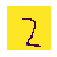

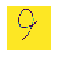

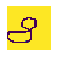

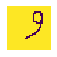

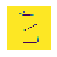

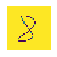

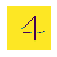

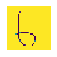

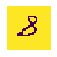

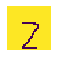

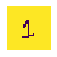

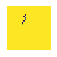

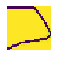

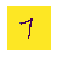

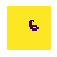

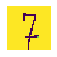

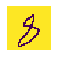

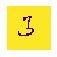

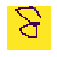

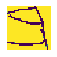

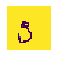

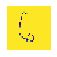

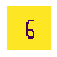

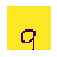

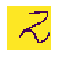

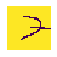

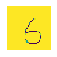

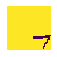

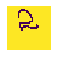

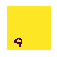

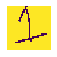

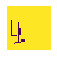

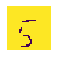

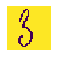

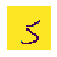

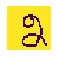

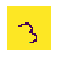

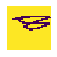

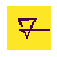

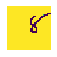

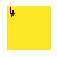

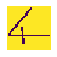

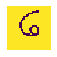

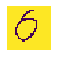

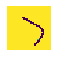

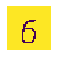

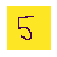

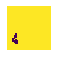

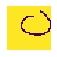

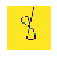

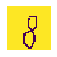

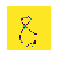

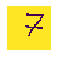

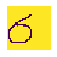

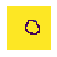

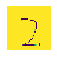

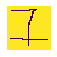

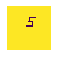

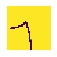

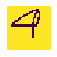

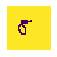

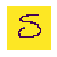

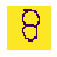

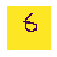

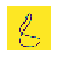

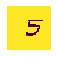

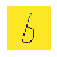

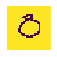

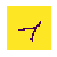

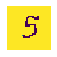

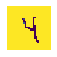

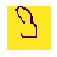

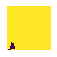

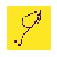

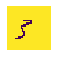

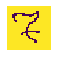

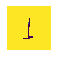

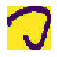

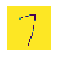

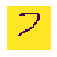

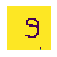

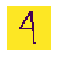

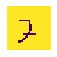

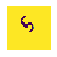

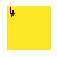

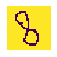

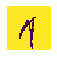

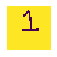

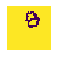

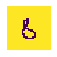

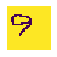

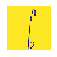

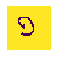

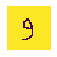

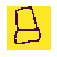

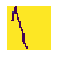

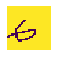

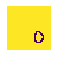

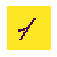

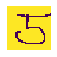

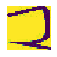

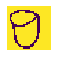

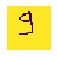

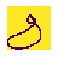

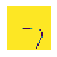

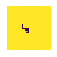

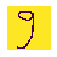

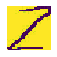

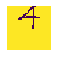

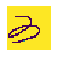

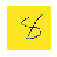

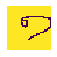

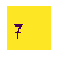

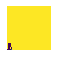

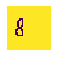

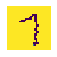

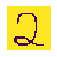

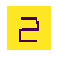

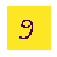

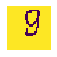

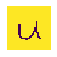

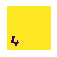

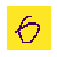

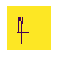

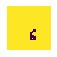

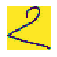

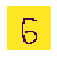

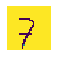

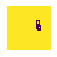

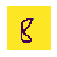

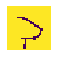

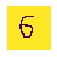

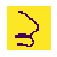

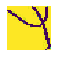

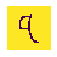

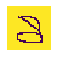

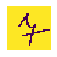

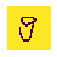

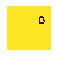

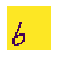

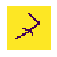

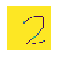

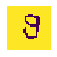

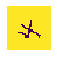

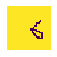

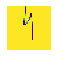

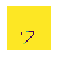

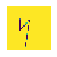

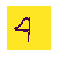

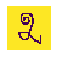

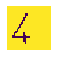

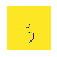

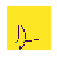

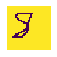

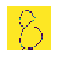

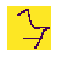

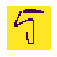

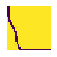

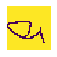

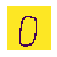

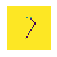

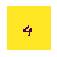

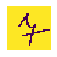

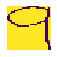

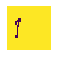

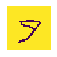

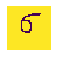

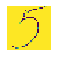

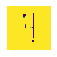

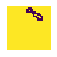

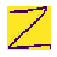

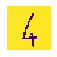

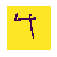

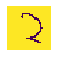

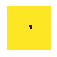

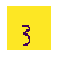

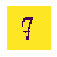

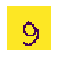

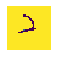

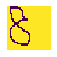

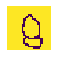

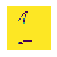

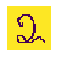

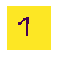

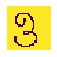

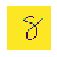

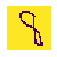

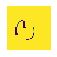

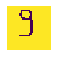

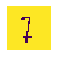

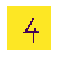

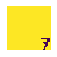

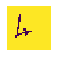

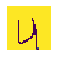

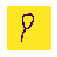

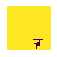

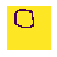

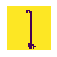

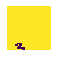

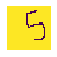

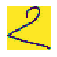

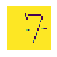

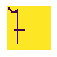

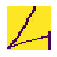

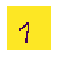

In [497]:
for i,j in enumerate(error):
    plt.figure(figsize=(42,20))
    plt.subplot(21,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[j])


In [448]:
predictions

array([[5.65007189e-03, 1.30905775e-08, 5.18916466e-04, ...,
        1.14197619e-05, 9.88049805e-01, 1.92613050e-03],
       [8.44732710e-08, 4.58026014e-04, 2.97273090e-03, ...,
        9.95484352e-01, 8.33714148e-05, 5.05293792e-05],
       [1.19590522e-05, 4.39012932e-12, 2.66486995e-06, ...,
        5.86391934e-06, 3.95307899e-04, 1.85623560e-02],
       ...,
       [4.43865992e-02, 2.90810294e-03, 8.92869662e-03, ...,
        1.05080903e-02, 3.67263658e-03, 3.98562178e-02],
       [2.97858642e-04, 2.20206450e-04, 6.36876142e-03, ...,
        4.67805564e-01, 4.35940363e-03, 1.80004641e-01],
       [2.08889105e-04, 9.57114352e-08, 7.20964044e-06, ...,
        7.50688851e-05, 4.15591610e-04, 3.75385256e-03]], dtype=float32)

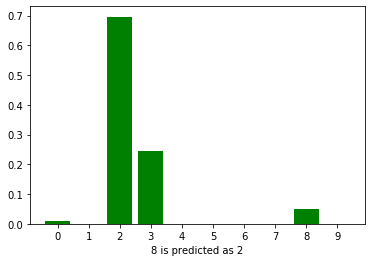

In [465]:
i=99
plot_values_array(predictions[i],np.squeeze(Y_train[i]))


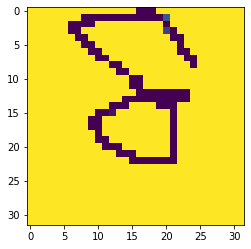

In [466]:
plt.imshow(X_train[i])

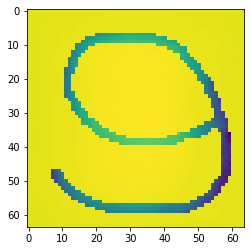

In [138]:
plt.imshow(X_train[12])

In [188]:
np.int64(model.predict(X_train[51].reshape(1,64,64,1))==np.max(model.predict(X_train[51].reshape(1,64,64,1))))

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [189]:
Y_train[51]

array([8])

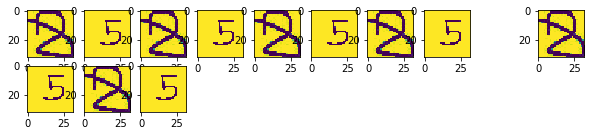

In [487]:
plt.figure(figsize=(10,10))
plt.subplot(10,10,1)
plt.imshow(X_train[0])
plt.subplot(10,10,2)
plt.imshow(X_train[2])
plt.subplot(10,10,3)
plt.imshow(X_train[0])
plt.subplot(10,10,4)
plt.imshow(X_train[2])
plt.subplot(10,10,5)
plt.imshow(X_train[0])
plt.subplot(10,10,6)
plt.imshow(X_train[2])
plt.subplot(10,10,7)
plt.imshow(X_train[0])
plt.subplot(10,10,8)
plt.imshow(X_train[2])
plt.subplot(10,10,10)
plt.imshow(X_train[0])
plt.subplot(10,10,11)
plt.imshow(X_train[2])
plt.subplot(10,10,12)
plt.imshow(X_train[0])
plt.subplot(10,10,13)
plt.imshow(X_train[2])

